In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_excel('/Users/muzahidulislam/Developer/ML/healthCarePremium_project/premiums_young.xlsx')

In [3]:
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [105]:
df.shape

(20092, 13)

In [5]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [6]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [7]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle NA value

In [8]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0],inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1040079542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1040079542.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df['income_level'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20091    False
20092    False
20093    False
20094    False
20095    False
Name: income_level, Length: 20096, dtype: bool

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [13]:
df.shape

(20092, 13)

In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20092.000000,20092.000000,20092.000000,20092.000000
mean,21.494326,0.717947,22.509904,8142.032899
std,2.294030,0.940693,23.419732,2749.817778
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [16]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [17]:
df['number_of_dependants']=abs(df['number_of_dependants'])

In [18]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20092.000000,20092.000000,20092.000000,20092.000000
mean,21.494326,0.722526,22.509904,8142.032899
std,2.294030,0.937181,23.419732,2749.817778
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [19]:
df[df.age>100].shape

(0, 13)

In [20]:
numeric_columns = df.select_dtypes(['int64','float64'])
numeric_columns.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

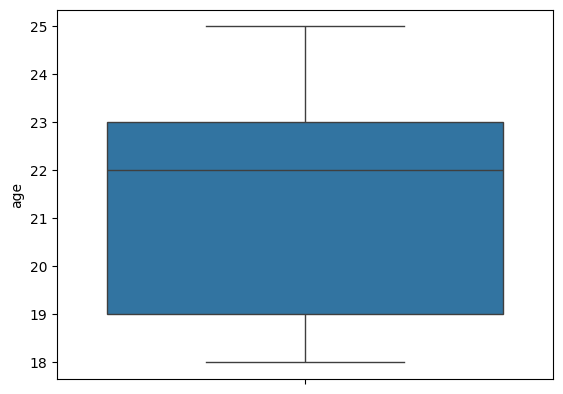

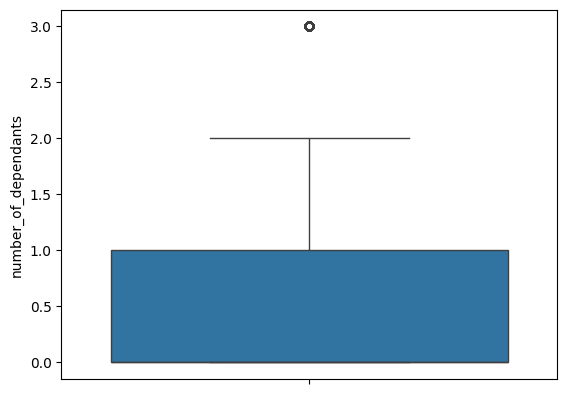

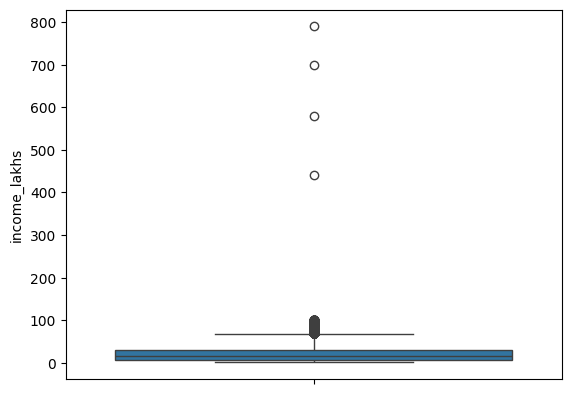

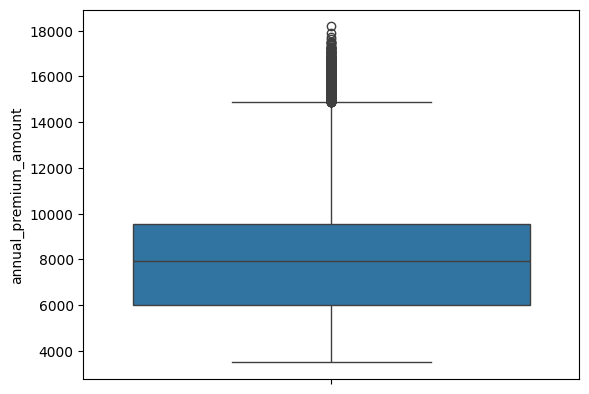

In [21]:
for col in numeric_columns:
    sns.boxplot(df[col])
    plt.show()

In [22]:
df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


In [23]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [24]:
df.shape

(20092, 13)

In [25]:
df1=df[df.age<100].copy()

In [26]:
df1.shape

(20092, 13)

<Axes: ylabel='age'>

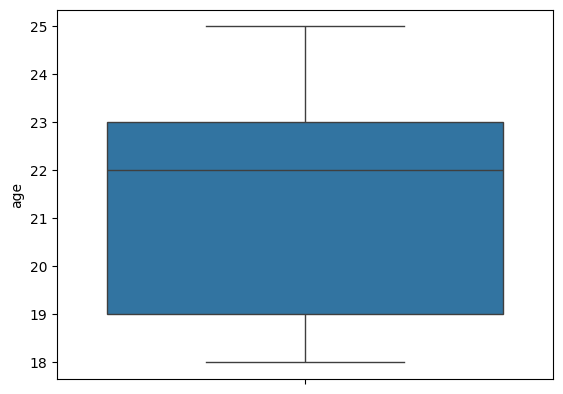

In [27]:
sns.boxplot(df1['age'])

In [28]:
df1.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [29]:
df1.income_lakhs.shape

(20092,)

In [30]:
q3=df.income_lakhs.quantile(.75)

In [31]:
q3

np.float64(31.0)

In [32]:
def get_iqr_bounds(col):
    q1,q3 = col.quantile([.25,.75])
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return lower_bound,upper_bound

In [33]:
get_iqr_bounds(df1.income_lakhs)

(-31.5, 68.5)

In [34]:
quatile_treshold=df1.income_lakhs.quantile(.999)

In [35]:
df1[df1.income_lakhs>quatile_treshold].shape

(4, 13)

In [36]:
df2=df1[df1.income_lakhs<quatile_treshold]

In [37]:
df2.shape

(20056, 13)

In [38]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20056.000000,20056.000000,20056.000000,20056.000000
mean,21.493967,0.722377,22.265606,8136.839450
std,2.294360,0.937014,21.526296,2748.043558
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6019.000000
50%,21.000000,0.000000,16.000000,7936.500000
75%,23.000000,1.000000,31.000000,9552.250000
max,25.000000,3.000000,99.000000,18186.000000


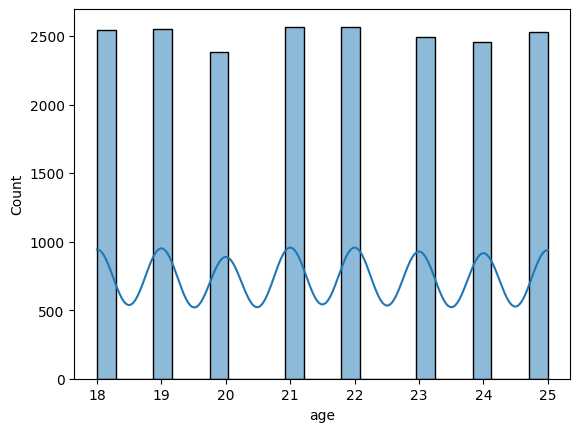

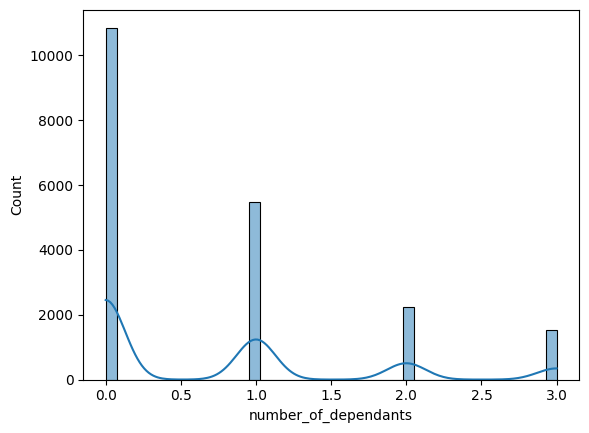

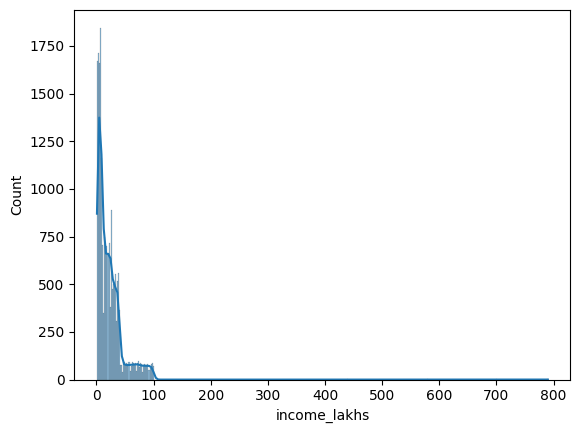

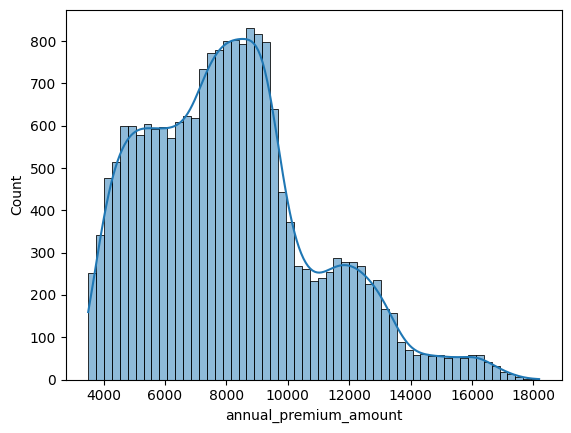

In [39]:
for col in numeric_columns:
    sns.histplot(df1[col],kde=True)
    plt.show()

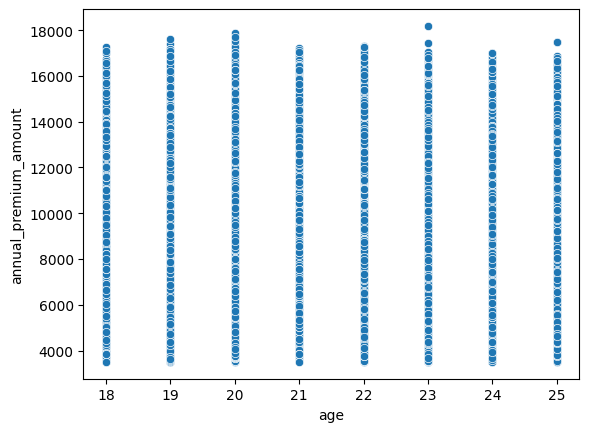

In [40]:
sns.scatterplot(df2, x='age',y='annual_premium_amount')
plt.show()

In [41]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [42]:
df2.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [43]:
categorical_columns=df2.select_dtypes('object')

In [44]:
categorical_columns.columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [45]:
for col in categorical_columns:
    print(col, ": ", df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status :  ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level :  ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history :  ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan :  ['Silver' 'Bronze' 'Gold']


In [46]:
df2.smoking_status=df2['smoking_status'].replace(['Smoking=0', 'Does Not Smoke','Not Smoking'], 'No Smoking')

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/2590855560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.smoking_status=df2['smoking_status'].replace(['Smoking=0', 'Does Not Smoke','Not Smoking'], 'No Smoking')


In [47]:
df2.smoking_status.unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [48]:
for col in categorical_columns:
    print(col, ": ", df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status :  ['Regular' 'No Smoking' 'Occasional']
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level :  ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history :  ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan :  ['Silver' 'Bronze' 'Gold']


In [49]:
pct_count=df.gender.value_counts(normalize=True)
pct_count

gender
Male      0.550269
Female    0.449731
Name: proportion, dtype: float64

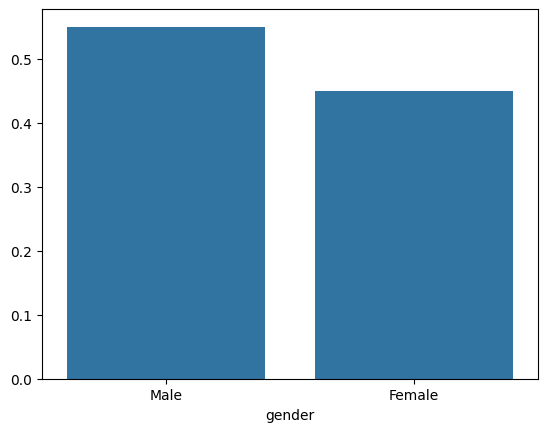

In [50]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

In [51]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [52]:
crosstab=pd.crosstab(df2.income_level, df2.insurance_plan)
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4509,326,828
25L - 40L,3382,209,608
<10L,6173,404,1145
> 40L,115,362,1995


<Axes: xlabel='insurance_plan', ylabel='income_level'>

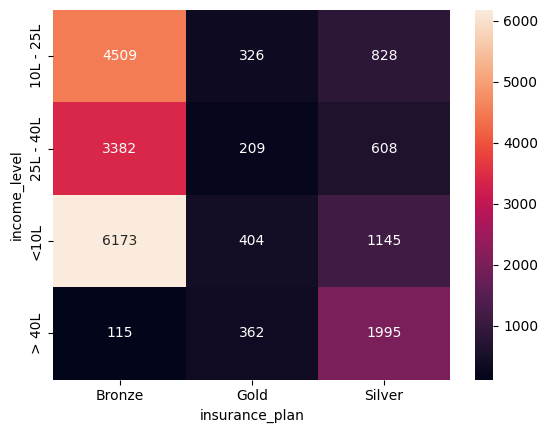

In [53]:
sns.heatmap(crosstab,annot=True,fmt='d')

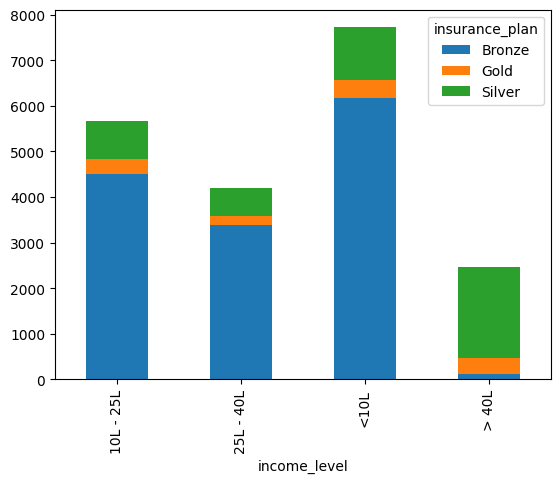

In [54]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

In [55]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [56]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [57]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/4265722347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/4265722347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())


In [58]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None


In [59]:
risk_score={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disese':0,
    'none':0
}


In [60]:
df2.disease1.fillna('none',inplace=True)
df2.disease2.fillna('none',inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1522888226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.disease1.fillna('none',inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1522888226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.disease1.fillna('none',inplace=True)
/var/fold

In [61]:
df2.disease2.unique()

array(['none', 'high blood pressure', 'heart disease', 'thyroid'],
      dtype=object)

In [62]:
df2['total_risk_score']=0
for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_score)
   

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1925737481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score']=0
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1925737481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score']+=df2[disease].map(risk_score)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/1925737481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [63]:
df2['total_risk_score'].fillna(0,inplace=True)
df2.head(10)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/3873623025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_risk_score'].fillna(0,inplace=True)
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_7941/3873623025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'].fillna(0,inplace=Tru

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6.0
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0.0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0.0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0.0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0.0
5,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,Gold,15473,high blood pressure,none,6.0
6,19,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,4097,no disease,none,0.0
7,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,diabetes,high blood pressure,12.0
8,23,Male,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,<10L,8,No Disease,Bronze,5387,no disease,none,0.0
9,20,Female,Northeast,Unmarried,0,Normal,Occasional,Salaried,10L - 25L,18,No Disease,Bronze,8866,no disease,none,0.0


In [64]:
for col in categorical_columns:
    print(col,' :',df2[col].unique())

gender  : ['Male' 'Female']
region  : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status  : ['Unmarried' 'Married']
bmi_category  : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status  : ['Regular' 'No Smoking' 'Occasional']
employment_status  : ['Self-Employed' 'Freelancer' 'Salaried']
income_level  : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history  : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan  : ['Silver' 'Bronze' 'Gold']


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder

In [66]:
df2.shape

(20056, 16)

In [67]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6.0
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0.0


In [68]:
df_ = df2.drop(columns=['medical_history','disease1','disease2'])
df_.head(10)
df_.shape

(20056, 13)

In [69]:
x=df_.drop(columns='annual_premium_amount')
y=df_['annual_premium_amount']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)
x_train.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,total_risk_score
17472,22,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,19,Bronze,0.0
9394,21,Male,Northwest,Unmarried,2,Overweight,No Smoking,Freelancer,<10L,6,Bronze,0.0


In [70]:
nominal_col=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
num_features = ['age', 'number_of_dependants', 'income_lakhs', 'total_risk_score']

In [71]:
category=[
    ['<10L', '10L - 25L', '25L - 40L','> 40L'],
    ['Bronze','Silver','Gold']
]

preprocessor=ColumnTransformer(transformers=[
    
    ('ord_en', OrdinalEncoder(categories=category),['income_level','insurance_plan']),
    ('scaling',MinMaxScaler(), num_features),
    ('nominal_en',OneHotEncoder(drop='first',dtype=int), nominal_col)
    
])

### build DataFrame after preprocess

In [72]:
x_train_transformed_aray = preprocessor.fit_transform(x_train)

In [73]:
x_test_transformed_array=preprocessor.transform(x_test)

In [106]:
x_test_transformed_array.shape

(6017, 18)

In [74]:
ord_en_features = preprocessor.named_transformers_['ord_en'].feature_names_in_
scaling_features = preprocessor.named_transformers_['scaling'].feature_names_in_
cat_features = preprocessor.named_transformers_['nominal_en'].get_feature_names_out(nominal_col)

all_features = list(ord_en_features) + list(scaling_features) + list(cat_features)
all_features

['income_level',
 'insurance_plan',
 'age',
 'number_of_dependants',
 'income_lakhs',
 'total_risk_score',
 'gender_Male',
 'region_Northwest',
 'region_Southeast',
 'region_Southwest',
 'marital_status_Unmarried',
 'bmi_category_Obesity',
 'bmi_category_Overweight',
 'bmi_category_Underweight',
 'smoking_status_Occasional',
 'smoking_status_Regular',
 'employment_status_Salaried',
 'employment_status_Self-Employed']

In [75]:
x_train_process = pd.DataFrame(x_train_transformed_aray, columns=all_features, index=x_train.index)
x_test_process = pd.DataFrame(x_test_transformed_array, columns=all_features, index=x_test.index)

print(x_train_process.shape, x_train_process.shape)



(14039, 18) (14039, 18)


In [76]:
for col in ['gender','region','marital_status','bmi_category','smoking_status','employment_status']:
    print(col, " :" ,df_[col].unique())

gender  : ['Male' 'Female']
region  : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status  : ['Unmarried' 'Married']
bmi_category  : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status  : ['Regular' 'No Smoking' 'Occasional']
employment_status  : ['Self-Employed' 'Freelancer' 'Salaried']


In [77]:

for col in ['gender','region','marital_status','bmi_category','smoking_status','employment_status']:
    oh=OneHotEncoder(drop='first')
    en = oh.fit_transform(df_[[col]])
    print(col,' : ',en.shape)

gender  :  (20056, 1)
region  :  (20056, 3)
marital_status  :  (20056, 1)
bmi_category  :  (20056, 3)
smoking_status  :  (20056, 2)
employment_status  :  (20056, 2)


### Model Train

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import classification_report
lr = LinearRegression()
lr.fit(x_train_process,y_train)

LinearRegression()

In [79]:
lr.score(x_test_process,y_test)


0.5965245430115877

In [80]:
lr.score(x_train_process,y_train)

0.6049126151461448

### Model Fine tune

In [81]:
lr1=Lasso()
lr1.fit(x_train_process,y_train)
lr1.score(x_test_process,y_test)

0.5966092591338679

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr2=RandomForestRegressor()
lr2.fit(x_train_process,y_train)
lr2.score(x_test_process,y_test)

0.5314451973618435

In [83]:
lr3=DecisionTreeRegressor()
lr3.fit(x_train_process,y_train)
lr3.score(x_test_process,y_test)

0.1542879927890105

In [84]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train_process,y_train)
print(model.score(x_test_process,y_test), model.score(x_train_process,y_train))

0.5550271272659302 0.7285021543502808


In [85]:
from sklearn.metrics import mean_squared_error
y_p=model.predict(x_test_process)


In [86]:
mean_squared_error(y_test,y_p)

np.float64(3329971.087683506)

In [87]:
x_test.index

Index([ 8233,  4234, 12207, 13805, 14009,  9621,  7492,  2952, 13928,  7574,
       ...
       15721,  4773, 15537,  1671, 10153, 16730, 16794, 15174, 17089, 18982],
      dtype='int64', length=6017)

In [88]:
x_test_process.index

Index([ 8233,  4234, 12207, 13805, 14009,  9621,  7492,  2952, 13928,  7574,
       ...
       15721,  4773, 15537,  1671, 10153, 16730, 16794, 15174, 17089, 18982],
      dtype='int64', length=6017)

### Eror Analysis

In [89]:
residuals = y_p - y_test

In [90]:
residuals_pct = residuals * 100 / y_test
residuals_pct

8233    -23.744677
4234     18.583848
12207    13.514133
13805   -28.350586
14009   -15.495379
           ...    
16730    -2.636561
16794    -8.801304
15174    -4.895216
17089   -14.098064
18982    -0.167771
Name: annual_premium_amount, Length: 6017, dtype: float64

In [91]:
results_df=pd.DataFrame({
    'actual':y_test,
    'predict':y_p,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head(3)

,actual,predict,diff,diff_pct
8233,8932,6811.125488,-2120.874512,-23.744677
4234,8570,10162.635742,1592.635742,18.583848
12207,5825,6612.198242,787.198242,13.514133


<Axes: xlabel='diff_pct', ylabel='Count'>

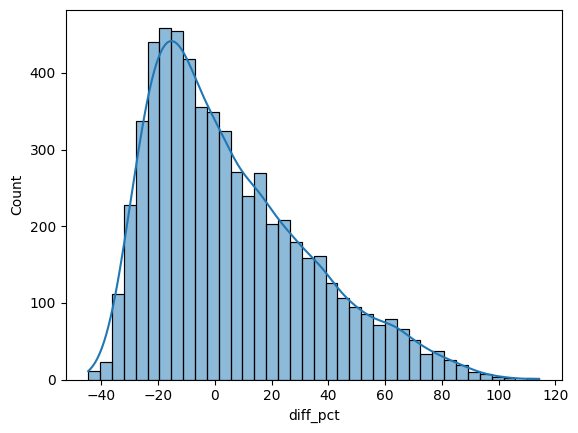

In [92]:
sns.histplot(results_df['diff_pct'], kde=True)

In [93]:
extreme_result_df = results_df[np.abs(results_df.diff_pct)>10]
extreme_result_df.shape

(4395, 4)

In [94]:
extreme_errors_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

73.04304470666445

In [95]:
results_df[np.abs(results_df.diff_pct)>10].sort_values('diff_pct', ascending=False)

,actual,predict,diff,diff_pct
641,3522,7547.430664,4025.430664,114.293886
11315,3665,7806.174316,4141.174316,112.992478
11114,4068,8328.973633,4260.973633,104.743698
15203,3890,7899.273438,4009.273438,103.066155
19805,3582,7211.140625,3629.140625,101.316042
...,...,...,...,...
4620,9049,5189.712402,-3859.287598,-42.648774
17270,10019,5741.583984,-4277.416016,-42.693043
16505,11260,6434.821777,-4825.178223,-42.852382
381,9213,5208.792480,-4004.207520,-43.462580


In [96]:
extreme_result_df.index 

Index([ 8233,  4234, 12207, 13805, 14009,  7492,  2952, 13928,  7574, 16186,
       ...
       20061,  3590, 13041, 10767, 14600, 15721,  4773,  1671, 10153, 17089],
      dtype='int64', length=4395)

In [97]:
x_test_process.index

Index([ 8233,  4234, 12207, 13805, 14009,  9621,  7492,  2952, 13928,  7574,
       ...
       15721,  4773, 15537,  1671, 10153, 16730, 16794, 15174, 17089, 18982],
      dtype='int64', length=6017)

### Actual aproach

In [98]:
extreme_errors_df = x_test_process.loc[extreme_result_df.index]
extreme_errors_df.head(3)

,income_level,insurance_plan,age,number_of_dependants,income_lakhs,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
8233,0.0,0.0,0.714286,0.000000,0.010204,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4234,2.0,1.0,0.142857,0.333333,0.306122,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12207,1.0,0.0,0.000000,0.333333,0.193878,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


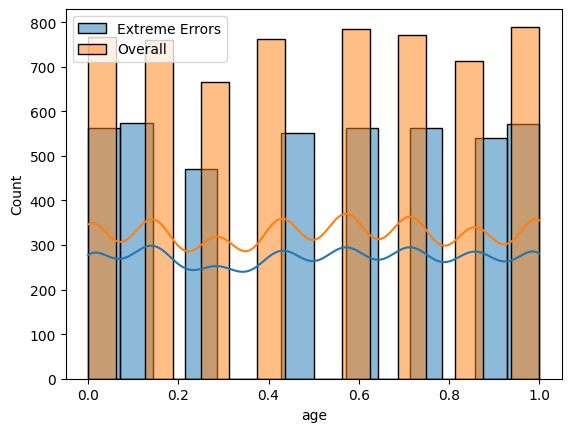

In [99]:
sns.histplot(extreme_errors_df.age, label='Extreme Errors', kde=True)
sns.histplot(x_test_process.age, kde=True, label = 'Overall')
plt.legend()
plt.show()

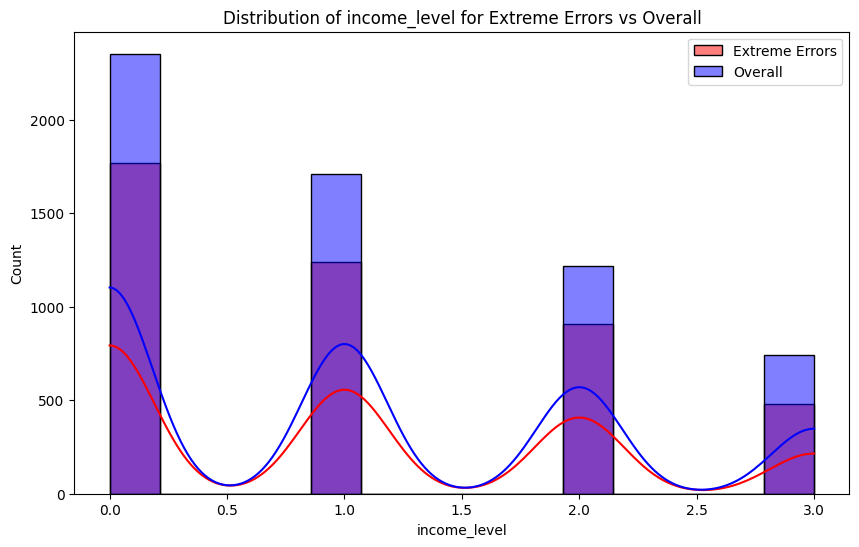

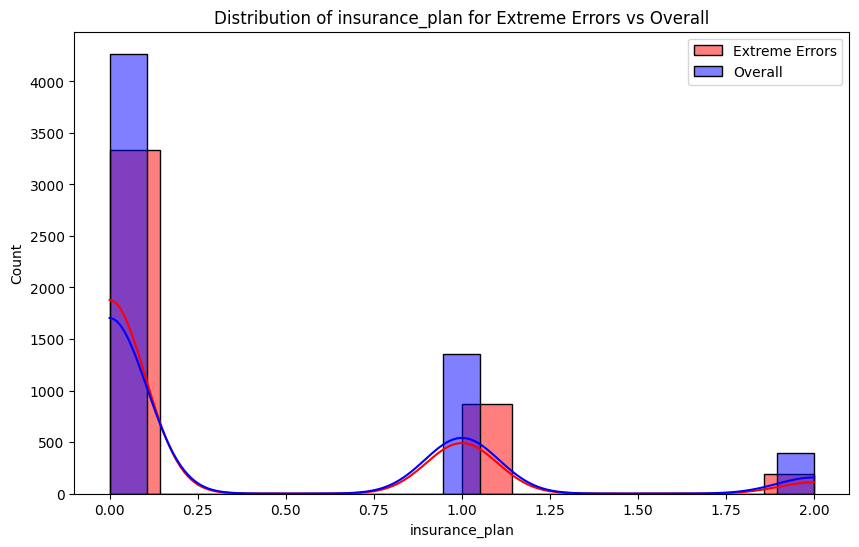

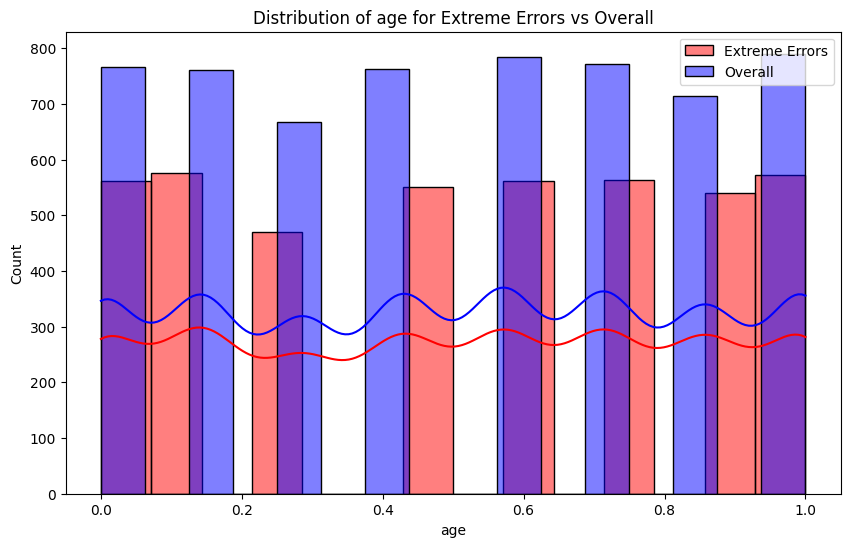

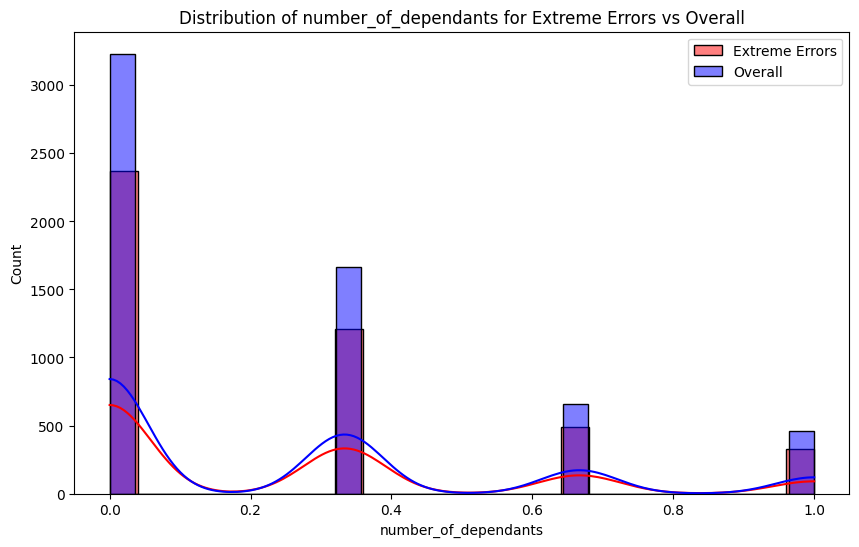

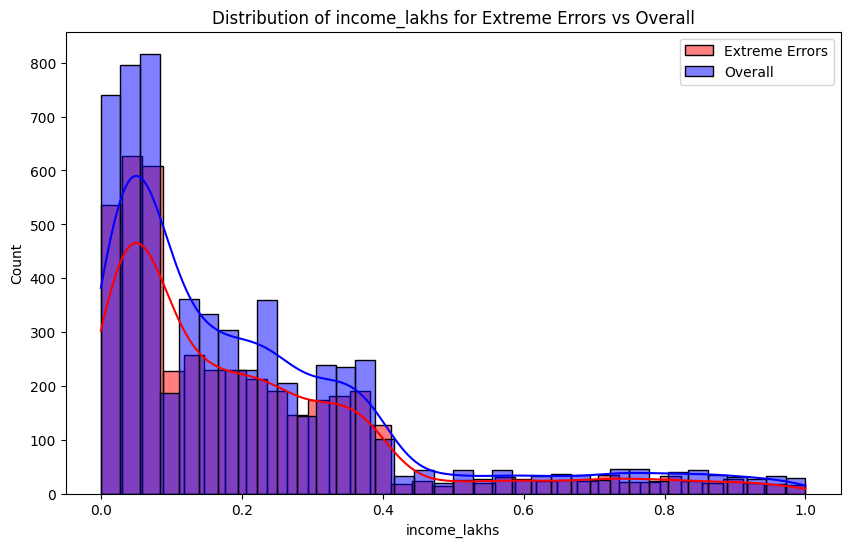

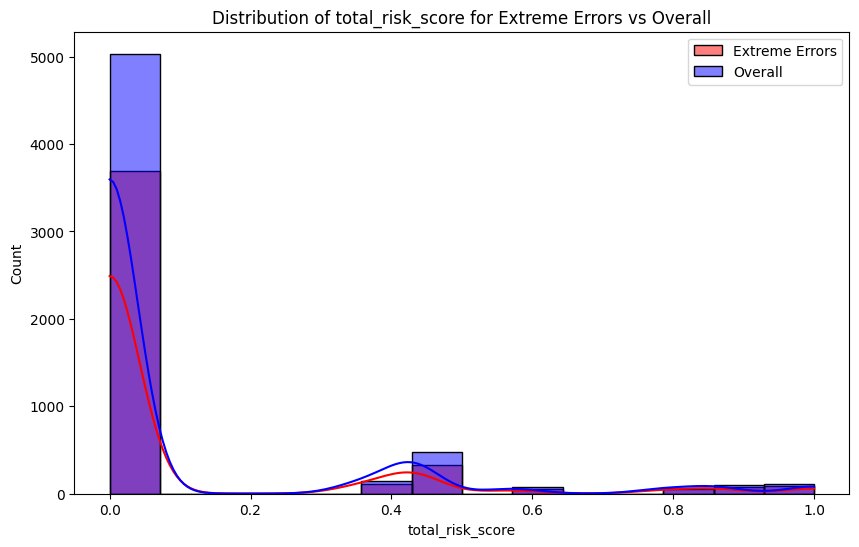

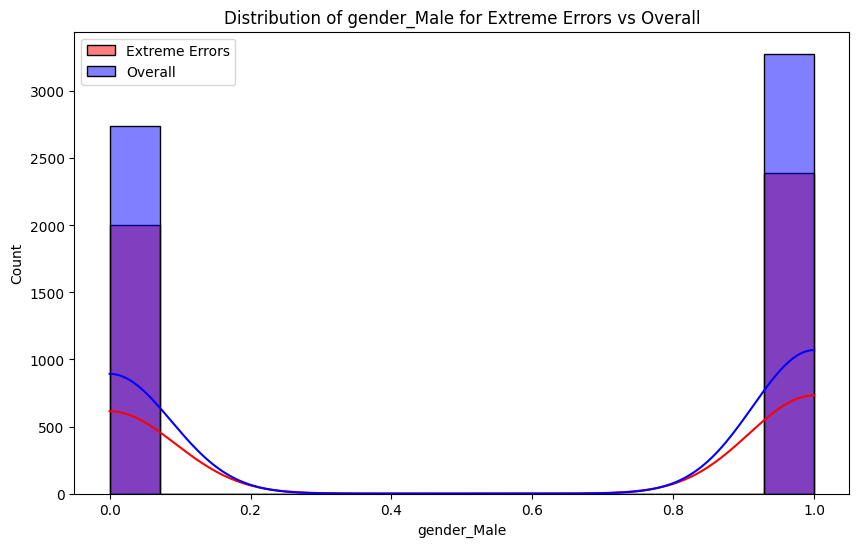

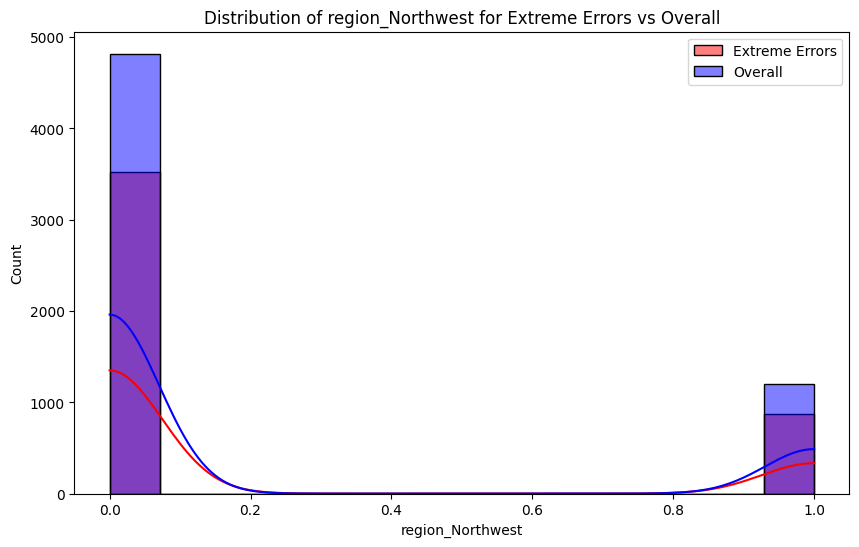

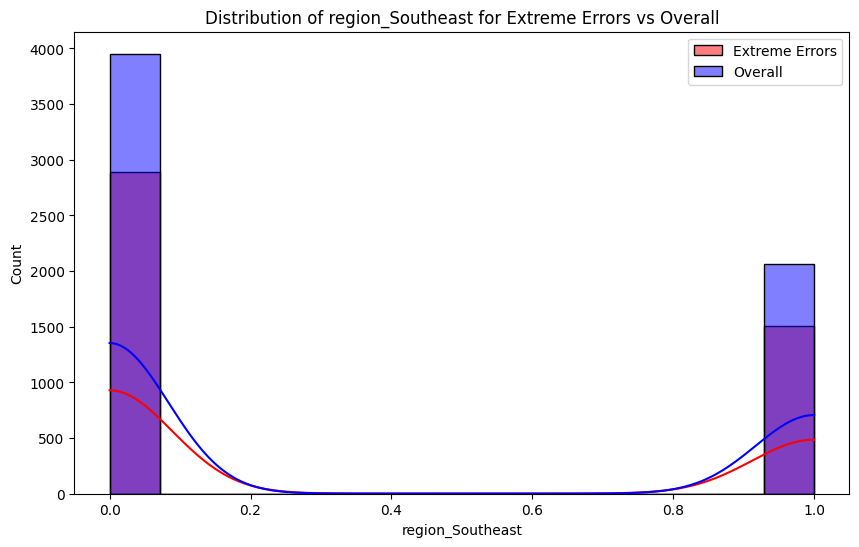

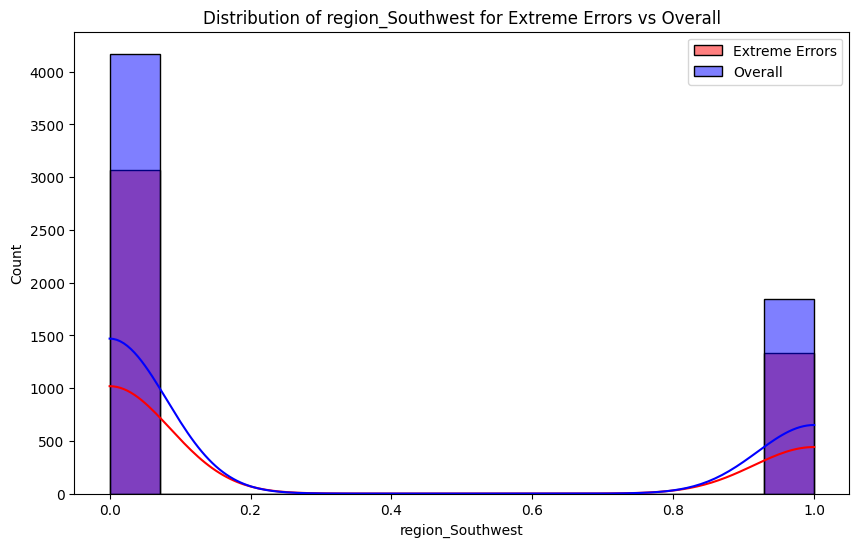

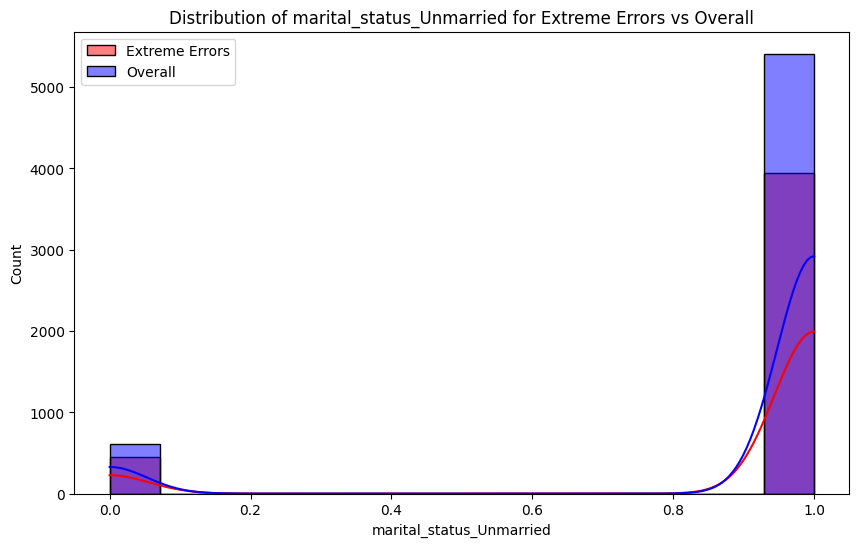

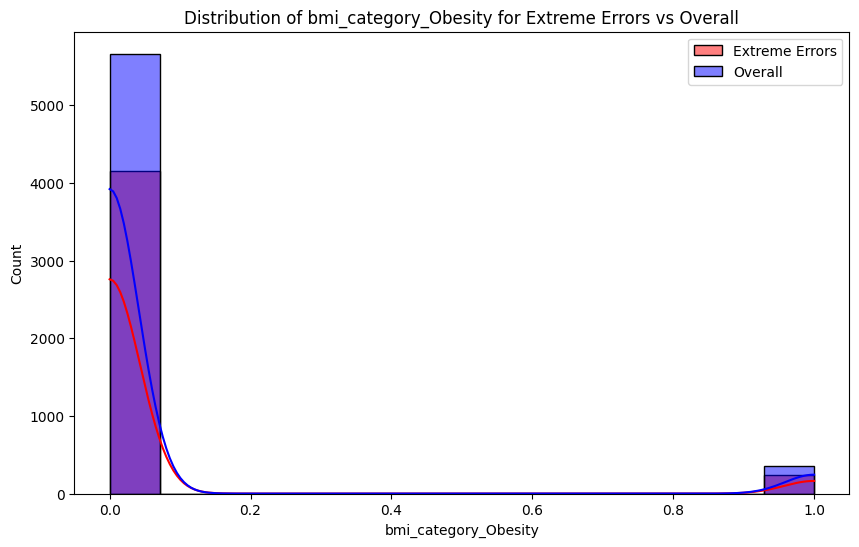

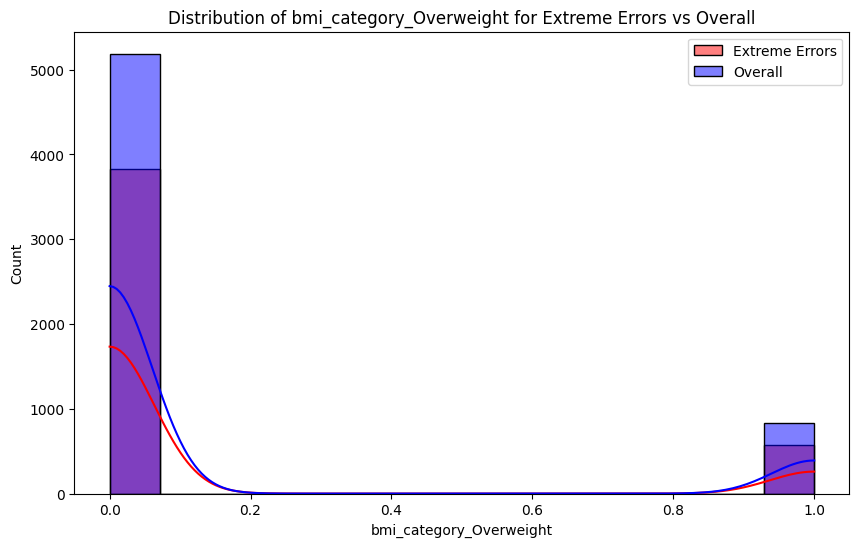

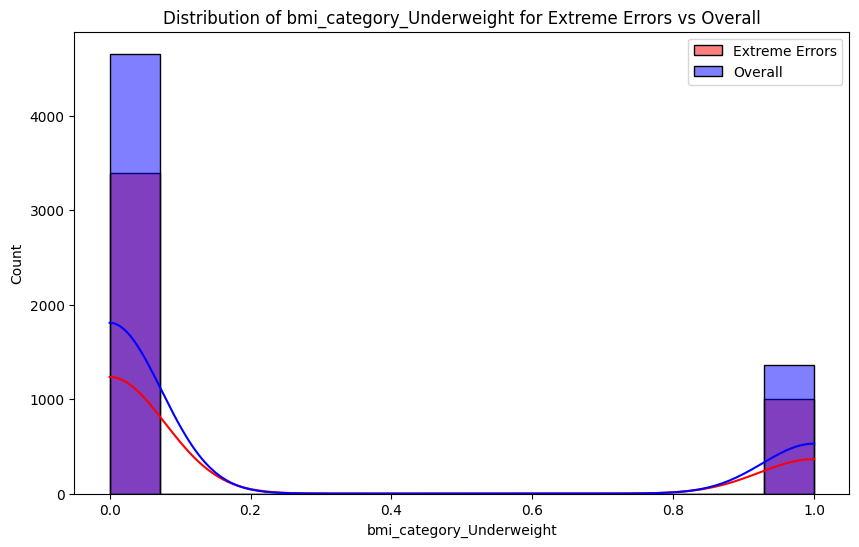

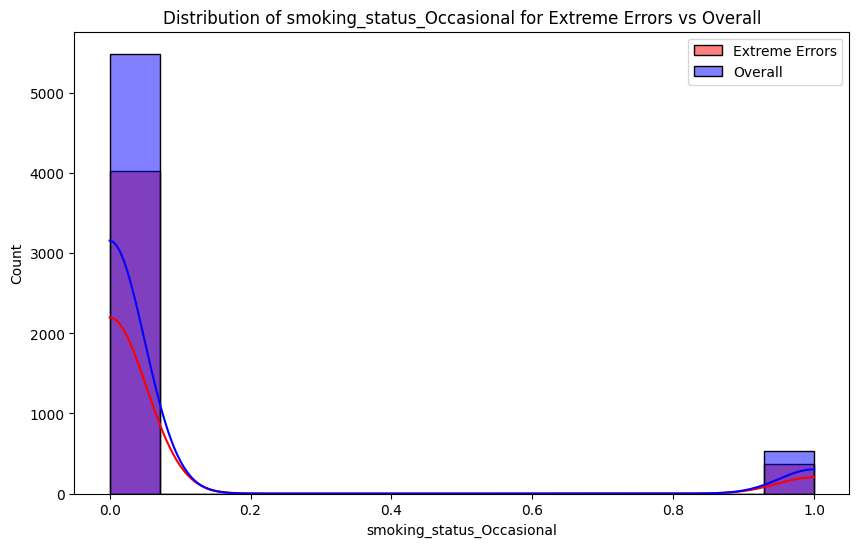

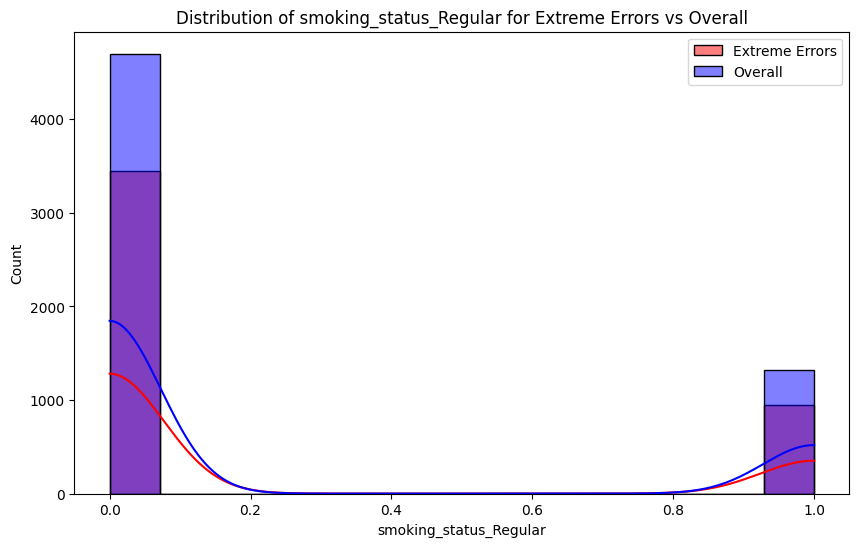

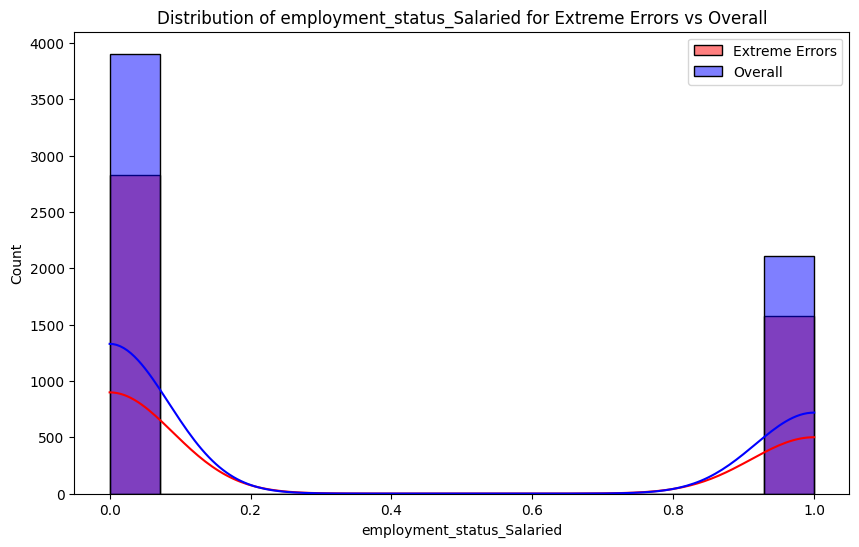

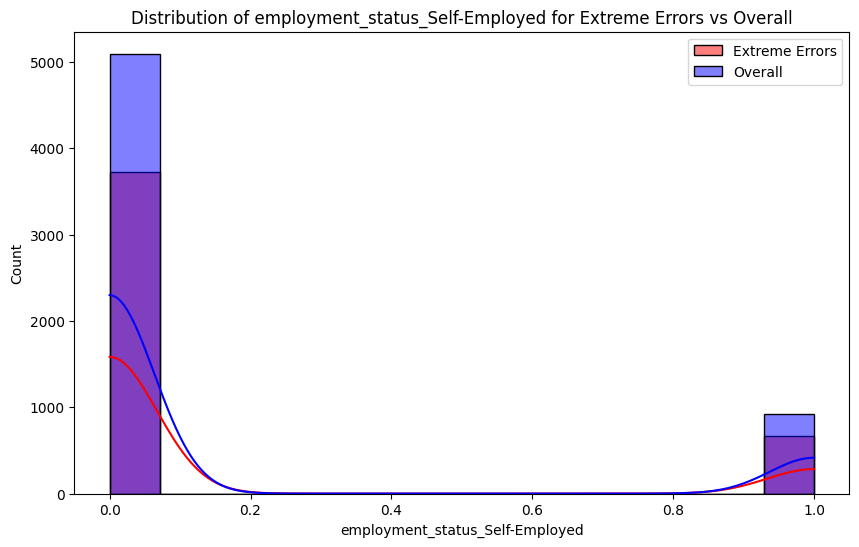

In [100]:
for col in extreme_errors_df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(extreme_errors_df[col], label='Extreme Errors', kde=True,color='red')
    sns.histplot(x_test_process[col], kde=True, label = 'Overall', color='blue')
    plt.legend()
    plt.title(f'Distribution of {col} for Extreme Errors vs Overall')
    plt.show()

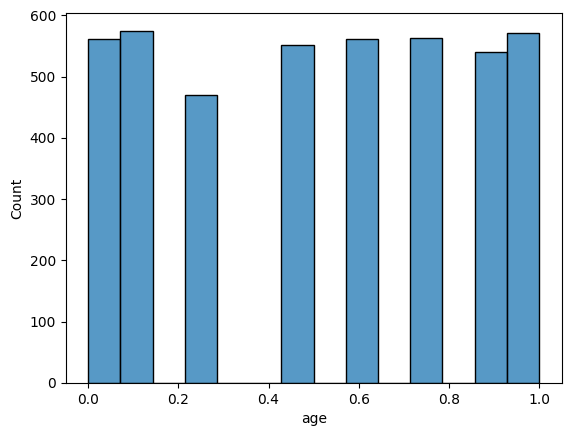

In [101]:
sns.histplot(extreme_errors_df.age)
plt.show()

### To get the actual age, reverse transform age


In [102]:
actual_errors = x_test.loc[extreme_result_df.index]
actual_errors.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,total_risk_score
8233,23,Female,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,<10L,2,Bronze,0.0
4234,19,Female,Southwest,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,31,Silver,0.0
12207,18,Male,Southeast,Unmarried,1,Underweight,No Smoking,Salaried,10L - 25L,20,Bronze,0.0


<Axes: xlabel='age', ylabel='Count'>

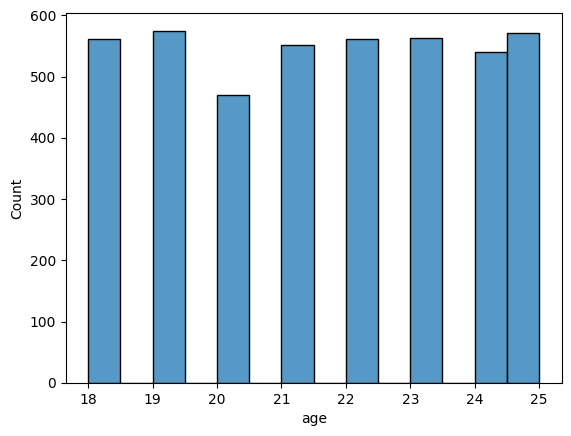

In [103]:
sns.histplot(actual_errors.age)

In [104]:
 actual_errors.age.quantile(.9)

np.float64(25.0)